In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import itertools as it


In [2]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30

use_all = False

target_tn = 30


# PROBABILITY
probability = 50

In [3]:
print( len(target_tso) )

10


In [4]:
# merge servers
# file name = WarmupExpP50tso24.csv
# scalar,J_Network.server_0,completedJob:mean

r1 = "vector"
r2 = "J_Network.queuer"
r3 = "jobsQueueLen:vector"

jqLen_all_tsos = []
qlen_tot = []
time_tot = []
for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jQlen_all_this_tso = []
    file_name_csv = f'Warmup{distribution}P{probability}tso{target_tso[tso_this_iter]}.csv'

    qlen_this = []
    time_this = []

    with open(f'../simulations/results_Warmups/{file_name_csv}') as csv_file : 
        reader = csv.reader(csv_file)
        for row in reader:
            if row[1]==r1 and row[2] == r2 and row[3]==r3:
                rigaTarget = list(row)
                tempi = rigaTarget[-2].split(" ")
                numeri = rigaTarget[-1].split(" ")
                for cont in range(0, len(tempi)):
                    jQlen_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                    
                    qlen_this.append( float(numeri[cont]) )
                    time_this.append( float(tempi[cont]) )
                
                if use_all == False:
                    break
    
    jqLen_all_tsos.append(jQlen_all_this_tso)
    print(f'{file_name_csv} _ len : {len(jqLen_all_tsos[tso_this_iter])}' )

    qlen_tot.append(qlen_this)
    time_tot.append(time_this)

# have < jqLen_all_tsos >

WarmupExpP50tso24.csv _ len : 1908
WarmupExpP50tso27.csv _ len : 1908
WarmupExpP50tso30.csv _ len : 1908
WarmupExpP50tso33.csv _ len : 1908
WarmupExpP50tso36.csv _ len : 1907
WarmupExpP50tso39.csv _ len : 1908
WarmupExpP50tso42.csv _ len : 1908
WarmupExpP50tso45.csv _ len : 1908
WarmupExpP50tso48.csv _ len : 1876
WarmupExpP50tso51.csv _ len : 1826


In [5]:
print(len(jqLen_all_tsos))
print(jqLen_all_tsos[7])
print(len(jqLen_all_tsos[7]))

10
[(1, 1432.574), (0, 1432.574), (1, 3049.983), (0, 3049.983), (1, 5310.658), (0, 5310.658), (1, 8657.946), (0, 8657.946), (1, 10319.748), (0, 10319.748), (1, 13832.53), (0, 13832.53), (1, 15249.492), (2, 18631.627), (3, 19623.514), (2, 21167.015), (3, 21382.126), (4, 23250.813), (5, 24124.044), (4, 24607.153), (5, 25159.979), (6, 25795.665), (5, 28312.729), (6, 29798.009), (7, 29903.101), (6, 31887.643), (5, 31887.952), (4, 32258.145), (3, 32620.622), (2, 33230.179), (3, 35869.943), (4, 36442.984), (5, 37313.468), (6, 38482.471), (7, 41306.484), (8, 44316.464), (9, 45671.277), (10, 46848.266), (11, 48359.245), (10, 48557.882), (11, 49257.215), (10, 51643.984), (9, 51992.788), (8, 52421.304), (7, 53148.425), (6, 53410.011), (7, 53934.072), (6, 54773.897), (5, 55224.731), (4, 55330.407), (3, 56655.775), (4, 57189.137), (5, 57321.771), (4, 57800.511), (5, 58062.611), (4, 58169.683), (5, 58226.701), (6, 60107.004), (7, 60143.77), (6, 60256.522), (5, 60791.823), (6, 60970.417), (5, 62156.

In [6]:
print(len(qlen_tot))
#   print(qlen_tot[7])
print(len(qlen_tot[7]))

10
1908


In [7]:
print(len(time_tot))
#   print(time_tot[7])
print(len(time_tot[7]))

10
1908


In [8]:
def winavg3(ts, xs, W, dx):
    rxs = []

    for wh in np.arange(0, ts[-1], dx):
        wl = wh - W

        if wl < ts[0]:
            rxs.append(0)
            continue
       
        i = np.searchsorted(ts, wh, side="rigth") - 1
        # sum to the rigth
        winsum = xs[i]
        # sum to the left
        j = i-1
        while ts[j] > wl:
            winsum += xs[j]
            j -= 1
        winsum += xs[j]

        rxs.append(winsum / W)
    return np.arange(0, ts[-1], dx), np.asarray(rxs)

[1432.574, 1432.574, 3049.983, 3049.983, 5310.658, 5310.658, 8657.946, 8657.946, 10319.748, 10319.748, 13832.53, 13832.53, 15249.492, 18631.627, 19623.514, 21167.015, 21382.126, 23250.813, 24124.044, 24607.153, 25159.979, 25795.665, 28312.729, 29798.009, 29903.101, 31887.643, 31887.952, 32258.145, 32620.622, 33230.179, 35869.943, 36442.984, 37313.468, 38482.471, 41306.484, 44316.464, 45671.277, 46848.266, 48359.245, 48557.882, 49257.215, 51643.984, 51992.788, 52421.304, 53148.425, 53410.011, 53934.072, 54773.897, 55224.731, 55330.407, 56655.775, 57189.137, 57321.771, 57800.511, 58062.611, 58169.683, 58226.701, 60107.004, 60143.77, 60256.522, 60791.823, 60970.417, 62156.545, 62421.8, 63327.598, 64187.895, 64564.043, 69559.124, 69858.201, 71045.063, 71648.815, 72568.613, 72840.829, 76259.667, 76513.395, 76705.439, 76949.664, 78172.455, 80187.001, 80187.001, 87108.4, 87108.4, 88263.477, 88263.477, 91152.908, 91152.908, 94058.112, 94058.112, 95172.185, 96065.534, 96495.121, 96561.975, 9922

[(1, 1432.574), (0, 1432.574), (1, 3049.983), (0, 3049.983), (1, 5310.658), (0, 5310.658), (1, 8657.946), (0, 8657.946), (1, 10319.748), (0, 10319.748), (1, 13832.53), (0, 13832.53), (1, 15249.492), (0, 15249.492), (1, 18631.627), (0, 18631.627), (1, 19623.514), (2, 21382.126), (1, 21555.303), (0, 22514.555), (1, 23250.813), (0, 23250.813), (1, 24124.044), (0, 24124.044), (1, 25159.979), (0, 25159.979), (1, 25795.665), (0, 25795.665), (1, 29798.009), (2, 29903.101), (1, 32623.916), (0, 34269.837), (1, 35869.943), (0, 35869.943), (1, 36442.984), (0, 36442.984), (1, 37313.468), (0, 37313.468), (1, 38482.471), (0, 38482.471), (1, 41306.484), (0, 41306.484), (1, 44316.464), (0, 44316.464), (1, 45671.277), (0, 45671.277), (1, 46848.266), (0, 46848.266), (1, 48359.245), (0, 48359.245), (1, 49257.215), (0, 49257.215), (1, 53934.072), (0, 53934.072), (1, 57189.137), (0, 57189.137), (1, 57321.771), (0, 57321.771), (1, 58062.611), (0, 58062.611), (1, 58226.701), (0, 58784.503), (1, 60107.004), (

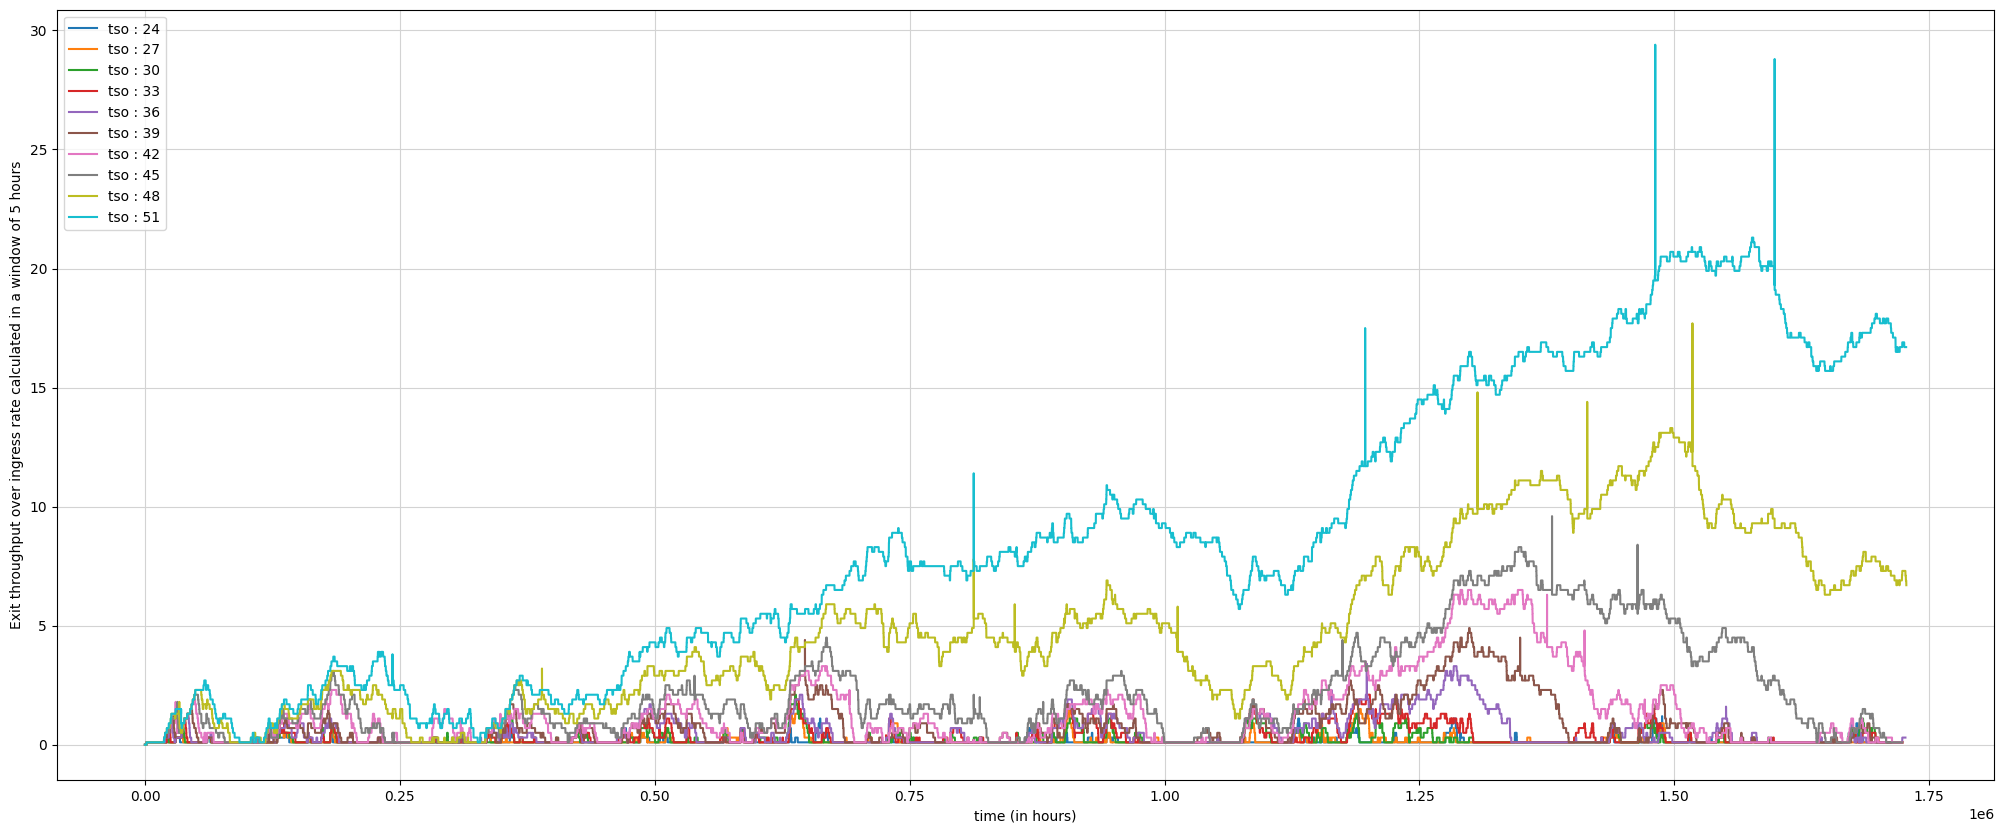

In [18]:
wsize = 5


plt.rcParams["figure.figsize"] = (25,10)
for plot_tso_this_iter in range( 0, len(target_tso), 1):
	print(jqLen_all_tsos[plot_tso_this_iter])
	#	vectime, vecvalue = jqLen_all_tsos[plot_tso_this_iter]

	vectime = np.array( time_tot[plot_tso_this_iter] )
	vecvalue = np.array( qlen_tot[plot_tso_this_iter] )

	ts, xs = winavg3(vectime , vecvalue, wsize, 1)
	plt.plot(ts, xs*target_tn/60, label=f"tso : {target_tso[plot_tso_this_iter]}")
	plt.legend(loc="upper left")
# plt.title(f"planeExitedTroughput with window of {wsize} hours with tn={tn}")
plt.grid(color="lightgray")
#	plt.xlim((0, 15))
#	plt.ylim((0, 3))
plt.ylabel(f"Exit throughput over ingress rate calculated in a window of {wsize} hours")
plt.xlabel("time (in hours)")
plt.show()